<h1>Part 4 :Examining Volcanos and Earthquakes: Is there a correlation between the two?</h1>

<h3>Part 4 By Natalie Marcom</h3> 

Adding onto the discussion of how earthquakes affect tsunamis, we will also discuss how earthquakes may affect volcanic eruptions. There are approximetely 1.5k active volcanos on earth. However, I will focus on connecting earthquakes and volcanic eruptions to stay within the scope of the class, as I am not a geophysicist.

I used data from NOAA, a website from Oregonstate.edu with the list of volcanos with their latitude and longitude, volcano and plate boundary shapefiles from ArcMap (Esri), as well as data from volcanodiscovery.org to find data concerning recent earthquakes near volcanos.

In [13]:
import requests
from lxml import html
from mpl_toolkits.basemap import Basemap

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Let's plot all 1500 volcanos on a map to see where most of them are located. Due to the difficulty to acquire a reasonable dataset of volcanos, besides a shapefile from Arcmap, we will scrape from a website that indicates the Latitude and longiude of all the volcanos to make plotting easy. We will also plot the volcanos on a basemap by the size of the volcano, via it's elevation height in meters.

In [14]:
page = requests.get('http://volcano.oregonstate.edu/oldroot/volcanoes/alpha.html')
tree = html.fromstring(page.content)
tables = tree.xpath('//table')

volcano_data = []
for volc in range(4, len(tables)):
    df = pd.read_html(html.tostring(tables[volc]), header=0)[0]
    volcano_data.append(df)

In [15]:
df_volc = pd.concat(volcano_data, ignore_index=True)


Let's look at a small snippet of the volcano dataset that was scraped. We will take note of the main observations of this dataset.

In [16]:
df_volc.head(10)

Name              Location               Type  Latitude  \
0              Abu          Honshu-Japan   Shield volcanoes     34.50   
1       Acamarachi               Chile-N      Stratovolcano    -23.30   
2       Acatenango             Guatemala      Stratovolcano     14.50   
3  Acigöl-Nevsehir                Turkey            Caldera     38.57   
4            Adams         US-Washington      Stratovolcano     46.21   
5  Adams  Seamount             Pacific-C  Submarine volcano    -25.37   
6          Adatara          Honshu-Japan    Stratovolcanoes     37.64   
7             Adwa              Ethiopia      Stratovolcano     10.07   
8           Afderà              Ethiopia      Stratovolcano     13.08   
9          Agrigan  Mariana Is-C Pacific      Stratovolcano     18.77   

   Longitude  Elevation (m)  
0     131.60          641.0  
1     -67.62         6046.0  
2     -90.88         3976.0  
3      34.52         1689.0  
4    -121.49         3742.0  
5    -129.27          -39.0  
6     140.29         1718.0  
7      40.84         1733.0  
8      40.85         1295.0  
9     145.67          965.0

<h1>Where are the volcanos located? Are they near tetonic plates?<h1>

In [17]:
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt1
import matplotlib as mpl
import shapefile
from mpl_toolkits.basemap import Basemap
import geopandas as gp

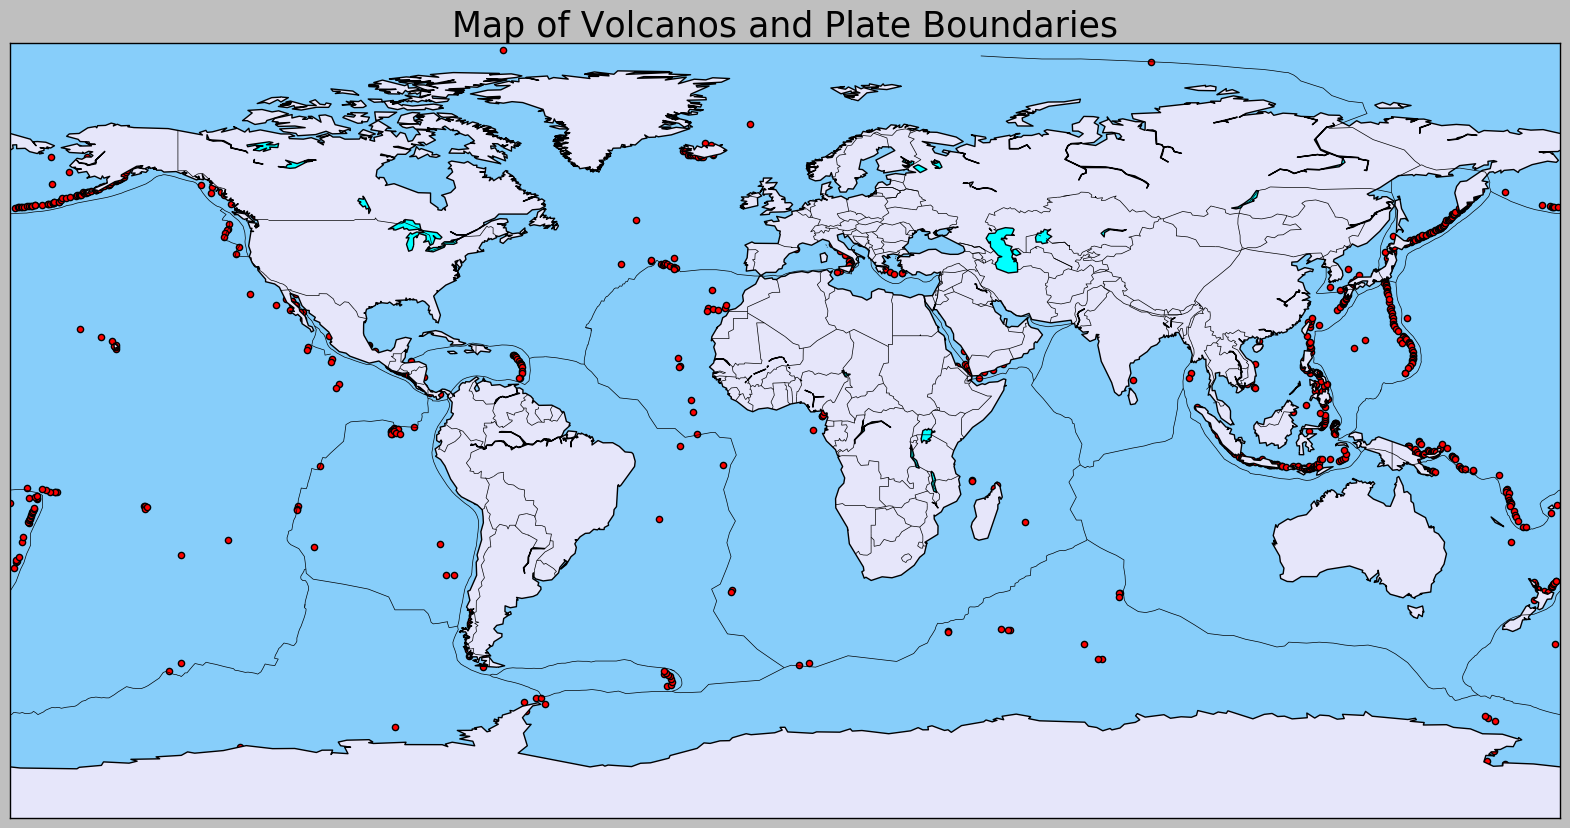

In [18]:
import os as osf
osf.chdir('C:\Users\jenat\\Documents\\ringoffire\\new')

volc = gp.GeoDataFrame.from_file('volcs.shp')
plt1.figure(figsize = (20, 12))
y = volc.LATX
x = volc.LONGX
map1 = Basemap()
map1.readshapefile('plate', 'plate')
map1.drawmapboundary(fill_color = 'lightskyblue')
map1.fillcontinents(color = 'lavender',lake_color = 'aqua')
map1.drawcountries()
map1.drawcoastlines()
volc_info = map1.readshapefile('volc1', 'volcs')

x1,y1 = map1(x,y)
map1.scatter(x1,y1,c = 'red',marker = "o",alpha = 1.0)
plt1.title("Map of Volcanos and Plate Boundaries", fontsize = 25)
plt1.show()

Using two shape files (one for plate bounaries, the other of the world's volcanos), we see that majority of the volcanos are very close to plate boundaries, that or they *are* along the tetonic plate boundaries.

------

However, besides plotting the volcanos on a map, let us take it a step further and plot volcanos as well as data that indicates whether one of these volcanos, had an eruption that was associated with an earthquake.  We will use two datasets to answer this question. The second dataset with the earthquake information mainly looks at volcano eruptions from 1790 to the present. I have decided to look at world volcanos for that data and not focus on a particular region of the world.

---------

<h1><u><center>How many of the volcanos have had eruptions that were associated with earthquakes?</center></h1></u>

In [19]:
import os
import pandas as pd
from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
os.chdir('C:\Users\jenat\Documents')
#second dataset
data = pd.read_csv("new_world_data_results_up1.csv")

In [20]:
data

Year  Month   Day  TSU   EQ           Name              Location  \
0      NaN    NaN   NaN  NaN  NaN            NaN                   NaN   
1  -1610.0    NaN   NaN  TSU   EQ      Santorini                Greece   
2    766.0    7.0  20.0  TSU   EQ    Sakura-jima          Kyushu-Japan   
3   1169.0    2.0   4.0  TSU   EQ           Etna                 Italy   
4   1565.0    8.0   NaN  NaN   EQ         Pacaya             Guatemala   
5   1600.0    2.0  19.0  NaN   EQ   Huaynaputina                  Peru   
6   1631.0    2.0  14.0  NaN   EQ       Dama Ali             Africa-NE   
7   1631.0   12.0  16.0  TSU   EQ       Vesuvius                 Italy   
8   1640.0    7.0  31.0  TSU   EQ    Komaga-take        Hokkaido-Japan   
9   1659.0    9.0  30.0  NaN   EQ   San Salvador           El Salvador   
10  1669.0    3.0  11.0  NaN   EQ           Etna                 Italy   
11  1679.0    9.0  21.0  NaN   EQ          Zukur               Red Sea   
12  1693.0    1.0   9.0  NaN   EQ           Etna                 Italy   
13  1707.0   12.0  16.0  NaN   EQ           Fuji          Honshu-Japan   
14  1716.0    9.0  24.0  TSU   EQ           Taal     Luzon-Philippines   
15  1741.0    8.0  23.0  TSU   EQ  Oshima-Oshima        Hokkaido-Japan   
16  1749.0    8.0  11.0  TSU   EQ           Taal     Luzon-Philippines   
17  1754.0    5.0  13.0  TSU   EQ           Taal     Luzon-Philippines   
18  1757.0    7.0   9.0  NaN   EQ      San Jorge                Azores   
19  1792.0    5.0  21.0  TSU   EQ          Unzen          Kyushu-Japan   
20  1820.0    3.0   1.0  TSU   EQ       Westdahl           Aleutian Is   
21  1827.0    6.0  27.0  TSU   EQ     Avachinsky             Kamchatka   
22  1837.0    9.0   NaN  TSU   EQ    Peuet Sague               Sumatra   
23  1840.0    2.0   2.0  TSU   EQ       Gamalama   Halmahera-Indonesia   
24  1845.0    2.0   8.0  TSU   EQ        Soputan    Sulawesi-Indonesia   
25  1857.0    4.0  17.0  TSU   EQ          Umboi      New Guinea-NE of   
26  1863.0    8.0  17.0  TSU   EQ          Yasur    Vanuatu-SW Pacific   
27  1868.0    4.0   3.0  TSU   EQ      Mauna Loa           Hawaiian Is   
28  1868.0    9.0   5.0  TSU   EQ           Etna                 Italy   
29  1871.0    4.0  30.0  TSU   EQ       Camiguin  Mindanao-Philippines   
30  1877.0    2.0  14.0  TSU   EQ      Mauna Loa           Hawaiian Is   
31  1878.0    2.0  11.0  TSU   EQ          Yasur    Vanuatu-SW Pacific   
32  1878.0    8.0  29.0  TSU   EQ          Okmok           Aleutian Is   
33  1885.0    5.0  25.0  NaN   EQ         Purace              Colombia   
34  1889.0    9.0   6.0  TSU   EQ     Banua Wuhu  Sangihe Is-Indonesia   
35  1901.0    8.0   9.0  TSU   EQ            Epi    Vanuatu-SW Pacific   
36  1909.0    4.0  28.0  NaN   EQ  Cameroon, Mt.              Africa-W   
37  1911.0    1.0  30.0  TSU   EQ           Taal     Luzon-Philippines   
38  1913.0    3.0  14.0  TSU   EQ            Awu  Sangihe Is-Indonesia   
39  1914.0    1.0  12.0  TSU   EQ    Sakura-jima          Kyushu-Japan   
40  1917.0    6.0   7.0  NaN   EQ   San Salvador           El Salvador   
41  1933.0    1.0   8.0  TSU   EQ    Kharimkotan              Kuril Is   
42  1937.0    5.0  29.0  TSU   EQ         Rabaul    New Britain-SW Pac   
43  1951.0    8.0   3.0  TSU   EQ      Cosiguina             Nicaragua   
44  1957.0    3.0  11.0  NaN   EQ       Vsevidof           Aleutian Is   
45  1960.0    5.0  25.0  TSU   EQ        Puyehue               Chile-C   
46  1963.0    5.0  16.0  NaN   EQ          Agung       Lesser Sunda Is   
47  1975.0   11.0  29.0  TSU   EQ        Kilauea           Hawaiian Is   
48  1980.0    5.0  18.0  TSU   EQ     St. Helens         US-Washington   
49  1982.0    3.0  28.0  NaN   EQ    Chichon, El                Mexico   
50  1983.0   10.0   3.0  NaN   EQ    Miyake-jima          Izu Is-Japan   
51  1987.0   12.0   1.0  NaN   EQ         Sirung       Lesser Sunda Is   
52  1991.0    6.0  15.0  NaN   EQ       Pinatubo     Luzon-Philippines   
53  2000.0

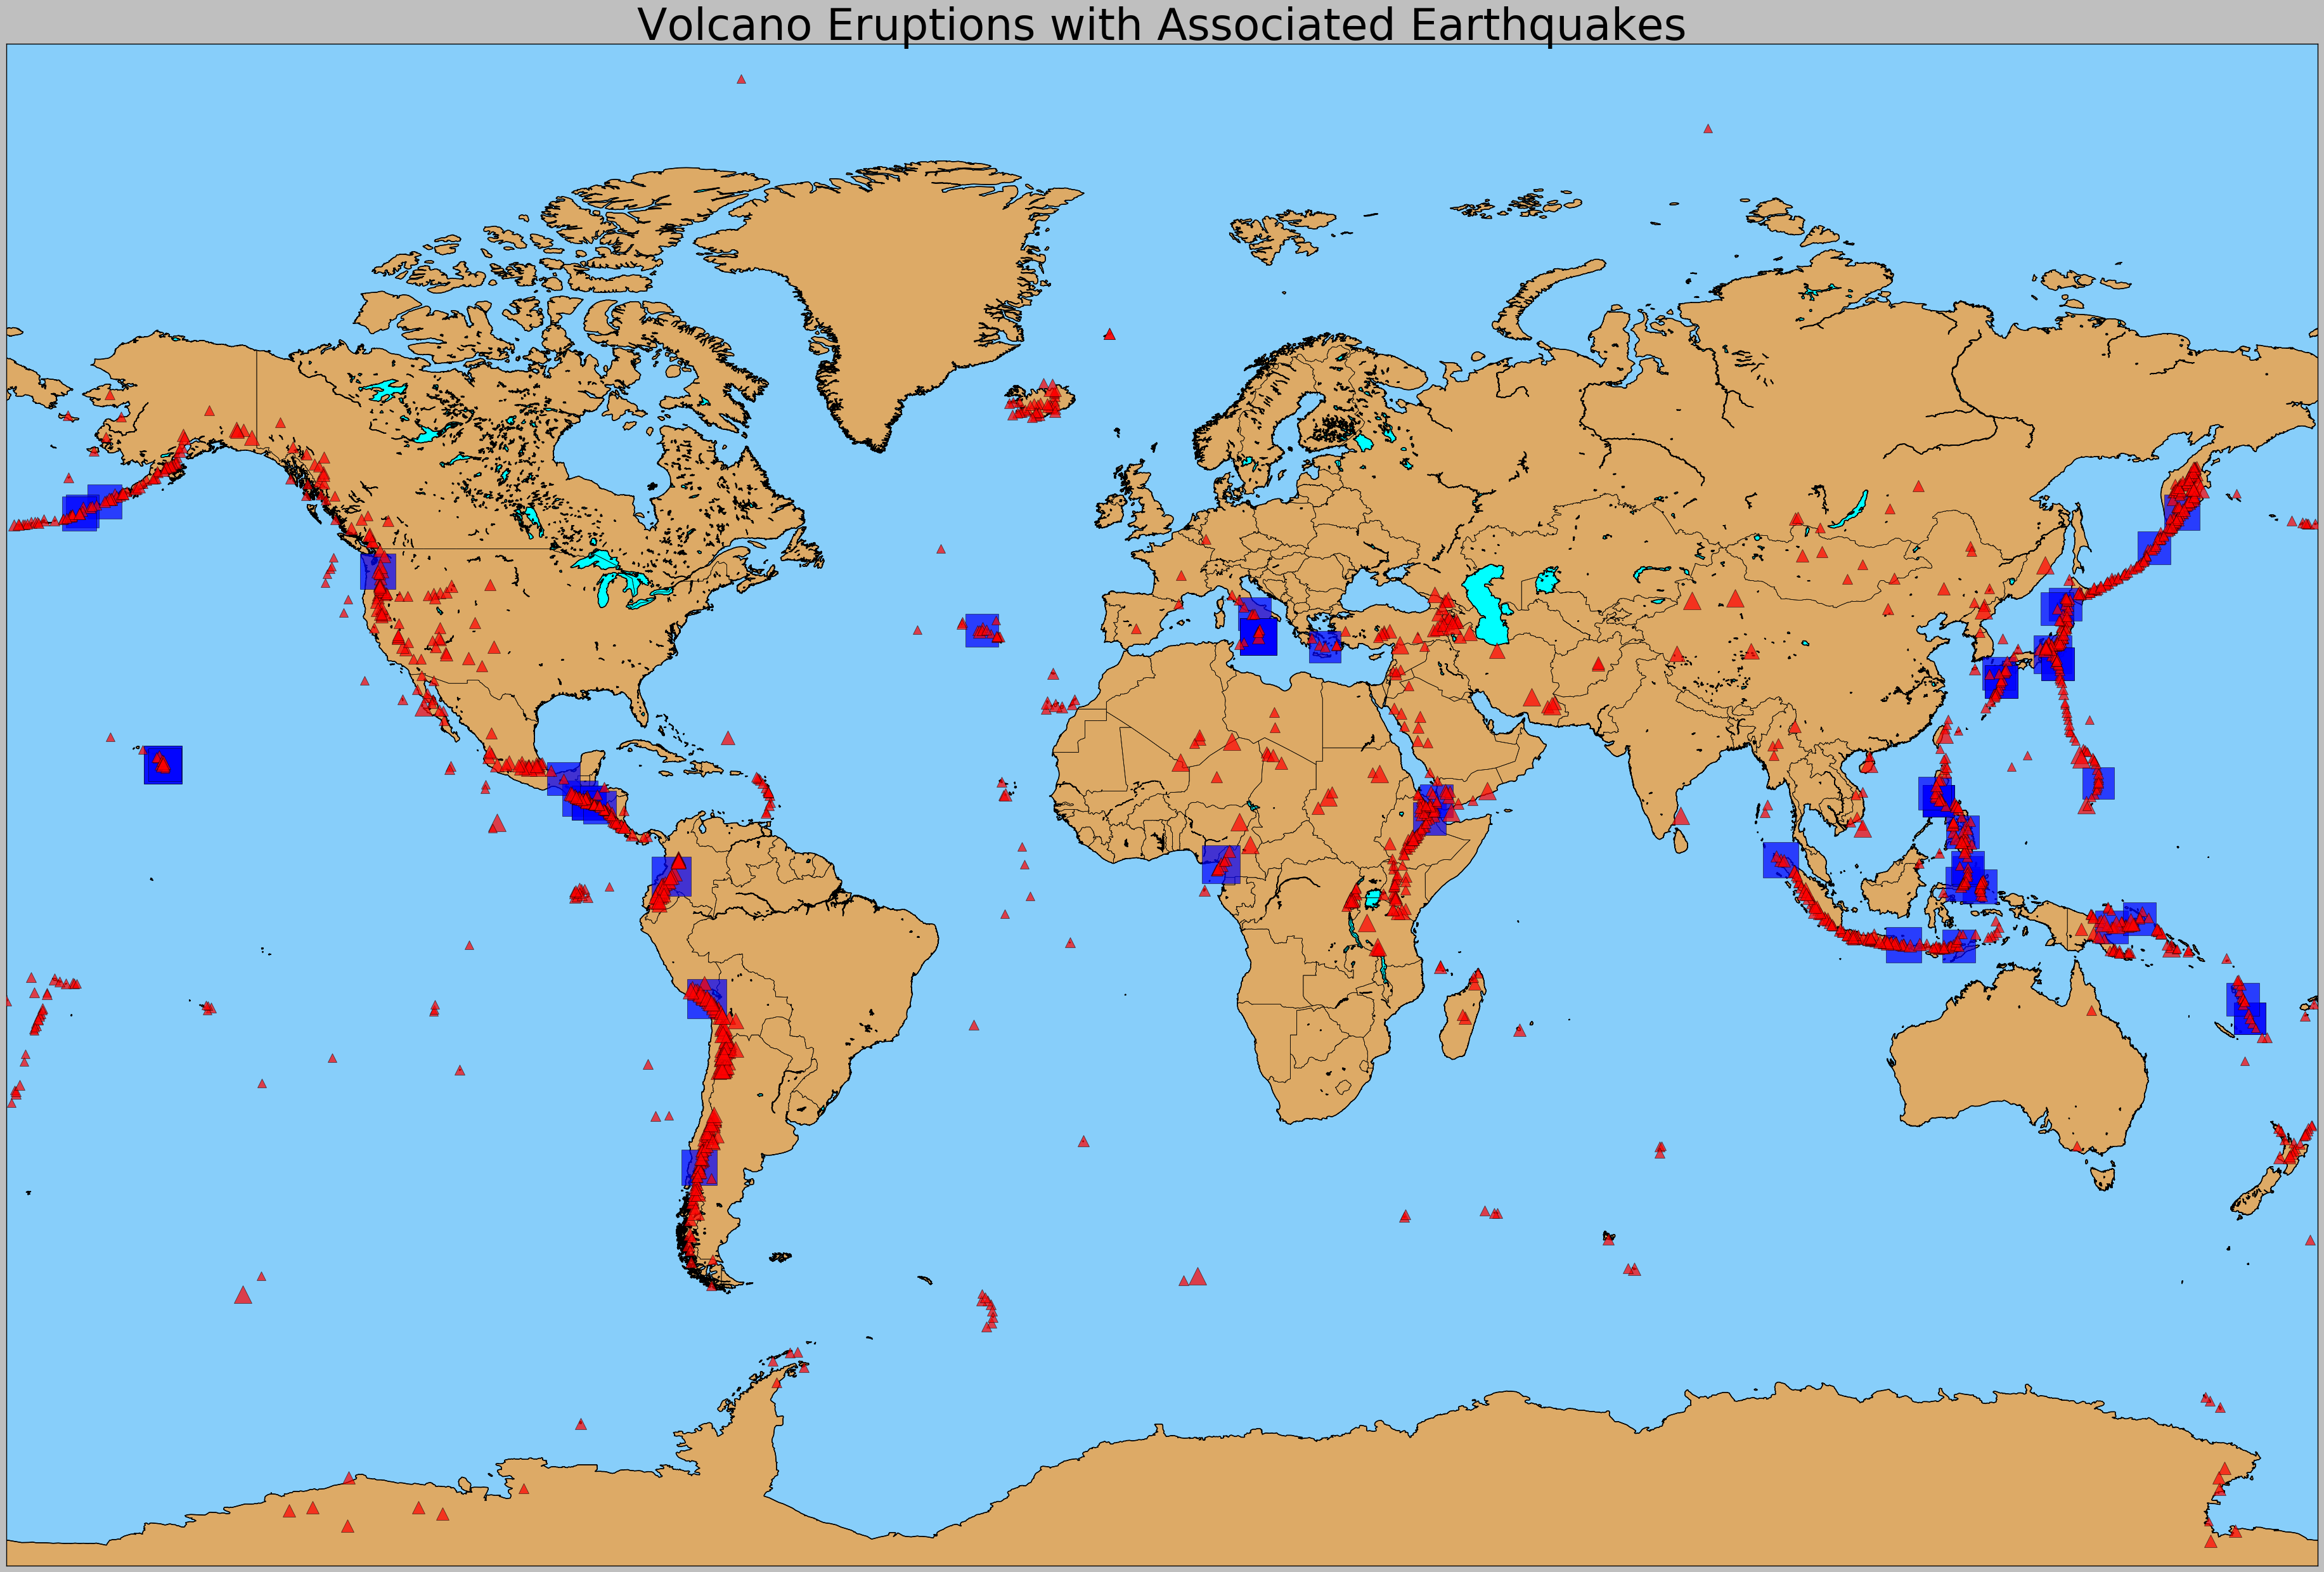

In [21]:
def plot_map2(lons, lats, elevations, llcrnrlat = -80, urcrnrlat = 90, llcrnrlon = -180, urcrnrlon = 180,resolution = 'i', projection='mill', lat_0 = 39.5, lon_0 = 1,min_marker_size=5):
    bins = np.linspace(0, elevations.max(), 10)
    marker_sizes = np.digitize(elevations, bins) + min_marker_size
    m2 = Basemap(projection=projection, llcrnrlat=llcrnrlat, urcrnrlat=urcrnrlat, llcrnrlon=llcrnrlon, urcrnrlon=urcrnrlon, resolution=resolution)
    m2.drawcountries()
    m2.drawmapboundary(fill_color='lightskyblue')
    m2.fillcontinents(color = '#ddaa66',lake_color='aqua')
    m2.drawcoastlines()

    for lon, lat, m2size in zip(lons, lats, marker_sizes):
        x, y = m2(lon, lat)
        m2.plot(x, y, 'bs', markersize=m2size, alpha=.7, zorder=4)

    return m2

def plot_map1(lons, lats, elevations, llcrnrlat=-80, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180,resolution='i', projection='mill', lat_0 = 39.5, lon_0 = 1,min_marker_size=2):
    bins = np.linspace(0, elevations.max(), 10)
    marker_sizes = np.digitize(elevations, bins) + min_marker_size
    m = Basemap(projection=projection, llcrnrlat=llcrnrlat, urcrnrlat=urcrnrlat, llcrnrlon=llcrnrlon, urcrnrlon=urcrnrlon, resolution=resolution)
    m.drawcountries()
    m.drawmapboundary(fill_color='lightskyblue')
    m.fillcontinents(color = '#ddaa66',lake_color='aqua')
    m.drawcoastlines()

    for lon, lat, msize in zip(lons, lats, marker_sizes):
        x, y = m(lon, lat)
        m.plot(x, y, '^r', markersize=msize, alpha=.7, zorder=4)

    return m

plt.figure(figsize=(60, 30))
m2 = plot_map2(data['Longitude'], data['Latitude'], data['Elevation'], min_marker_size=35)
m = plot_map1(df_volc['Longitude'], df_volc['Latitude'], df_volc['Elevation (m)'], min_marker_size=10)


plt.title('Volcano Eruptions with Associated Earthquakes', color='#000000', fontsize=50)

plt.show()


----

In the original NOAA dataset, there are 797 volcanic eruption observations, and 55 of them are eruptions associated with earthquakes. Taking this into account from this dataset (Volcanic eruptions from 1790-2016), <b>6.9% of the volcanic eruptions from the NOAA dataset, had an association with an earthquake</b>.

-------

The red triangles indicate the volcanos, and the blue squares indicate the volcanos who had an association with an earthquake prior to its eruption. Out of 1500 volcanos, there were about 55 volcanic eruptions that had this association. Many have these occurred in the 20th century. We also see that the majority of these earthquake and volcano association have happened along the ring of fire, which stretches along the Eastern edge of Asia, down to New Zealand, as well as from Alaska down to South America.

-----------

<h1><center><u>Closer Examination of Volcano Eruptions with Associated Earthquakes</h1></u></center>

Let's examine the different types of volcanos as well as the top 10 countries that had the most volcanic eruptions with associated earthquakes. Is there a particular region that had the most volcano eruptions?

In [22]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

<h3>Is there a type of Volcano that is more frequent with eruptions?</h3>

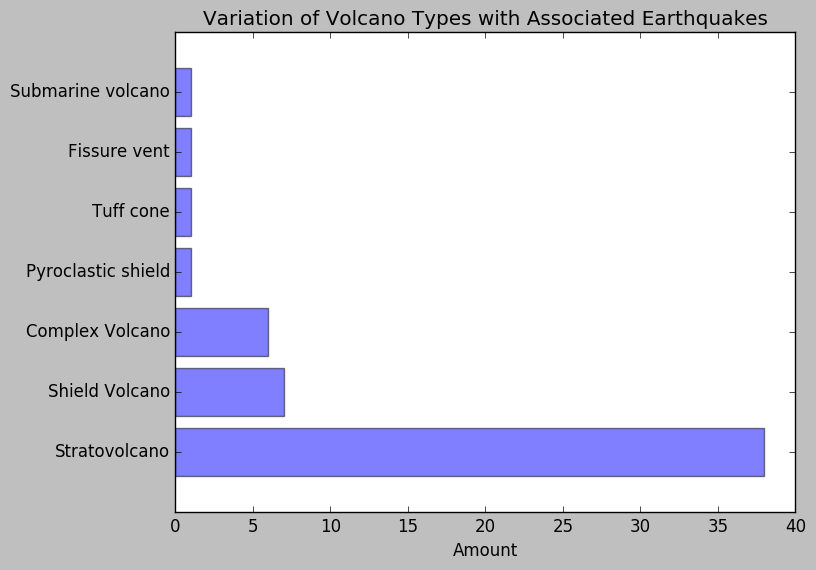

In [23]:
objects = ('Stratovolcano', 'Shield Volcano', 'Complex Volcano', 'Pyroclastic shield', 'Tuff cone', 'Fissure vent','Submarine volcano')
y_pos = np.arange(len(objects))
performance = [38,7,6,1,1,1,1]
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Amount')
plt.title('Variation of Volcano Types with Associated Earthquakes')
plt.show()

We see that stratovolcanos (for instance Mount St.Helens, is a stratovolcano) had the overall highest frequency of volcanic eruptions, and by a large proportion.

<h3> Which country has had volcanic eruptions the most?</h3>

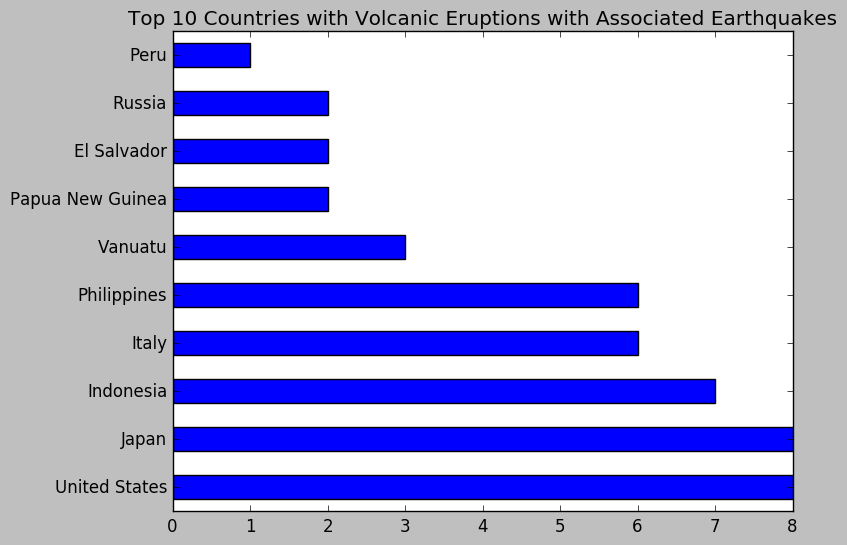

In [24]:
data['Country'].value_counts()[:10].plot(kind = 'barh', title = 'Top 10 Countries with Volcanic Eruptions with Associated Earthquakes')
plt.show()

We see that the United States and Japan have an equal amount of volcanic eruptions that had associations with earthquakes.

<h5>Due to the lack of magnitude observation, from the NOAA data (which gave an option of volcanic eruptions with association of earthquakes), a goal is to have a better observation of more detailed variables to help establish a correlatiopn between earthquakes and volcanic eruptions. However, because this is a topic that scientists are still debating, and many do not see an exact correlation between the two, we will take a different approach that may lead us to answers that we are looking for, which is establishing a correlation between earthquakes and volcanos.

<h2><center>Using data concerning earthquakes occurring close to volcanos</h2>

<h1><center><u>Examining link between Earthquakes and Volcanic eruptions</u></center></h1>

As stated before, scientists still are debating whether earthquakes and volcanic eruptions are connected or not, and there is a lack of information available that proved that the two are substantially linked to one or the other. However, I have found enough data indicating that earthquakes do occur near volcanos, which can suggest that it is *possible* for earthquakes and volcanos to be somewhat linked.

<h2>Is it possible for earthquakes and volcanos to come into close contact with one another?<h2>

In [25]:
import os
os.chdir('C:\Users\jenat\\Documents\\ringoffire')
import pandas as pd
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib as mpl


In [26]:
os.chdir('C:\Users\jenat\Documents\\ringoffire')
eqdata = pd.read_csv('earthquakesdata.csv')#dataset
eqdata1 = eqdata.convert_objects(convert_numeric=True)

C:\Users\jenat\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


<h2><center><u>Feb and March 2017 Earthquakes near Volcano data:</u></h2></center>

In [27]:
eqdata1

Time  Mag  Depth  \
0    Sat, 18 ar 19:47 UTC  2.3   13.2   
1    Sat, 18 ar 14:48 UTC  1.9   17.6   
2    Sat, 18 ar 13:57 UTC  1.6    2.2   
3    Sat, 18 ar 13:13 UTC  2.3      1   
4    Sat, 18 ar 12:57 UTC  2.2   27.7   
5    Sat, 18 ar 12:29 UTC  1.8    1.8   
6    Sat, 18 ar 12:08 UTC  1.6    0.7   
7    Sat, 18 ar 11:41 UTC  1.8      4   
8    Sat, 18 ar 11:27 UTC    3     17   
9    Sat, 18 ar 11:20 UTC  1.5      4   
10   Sat, 18 ar 10:51 UTC  4.7     10   
11   Sat, 18 ar 10:43 UTC  1.6    3.3   
12   Sat, 18 ar 10:07 UTC  2.3    3.1   
13   Sat, 18 ar 10:07 UTC  1.6    6.4   
14   Sat, 18 ar 09:51 UTC  1.6    7.7   
15   Sat, 18 ar 09:28 UTC  1.6    4.8   
16   Sat, 18 ar 09:25 UTC    2    4.8   
17   Sat, 18 ar 09:25 UTC  1.5    9.2   
18   Sat, 18 ar 08:59 UTC  1.5    7.6   
19   Sat, 18 ar 08:44 UTC  1.6    3.8   
20   Sat, 18 ar 08:40 UTC  2.1    3.4   
21   Sat, 18 ar 08:26 UTC  2.5      4   
22   Sat, 18 ar 08:26 UTC  1.5    4.8   
23   Sat, 18 ar 06:47 UTC  1.5    6.6   
24   Sat, 18 ar 06:22 UTC  2.9    7.1   
25   Sat, 18 ar 06:22 UTC  2.1    3.3   
26   Sat, 18 ar 05:28 UTC  2.4    5.1   
27   Sat, 18 ar 05:28 UTC  2.2    5.1   
28   Sat, 18 ar 05:05 UTC    2   26.4   
29   Sat, 18 ar 04:37 UTC  1.5    3.6   
..                    ...  ...    ...   
826  Thu, 2 Feb 18:04 UTC    3      7   
827  Thu, 2 Feb 12:47 UTC  3.3      8   
828  Thu, 2 Feb 06:52 UTC  2.1    1.2   
829  Thu, 2 Feb 04:50 UTC  1.9      3   
830  Thu, 2 Feb 01:37 UTC  2.4    5.9   
831  Wed, 1 Feb 21:37 UTC  1.9    9.3   
832  Wed, 1 Feb 21:33 UTC  2.3    8.5   
833  Wed, 1 Feb 21:29 UTC  1.9   14.8   
834  Wed, 1 Feb 18:52 UTC  2.1    3.1   
835  Wed, 1 Feb 18:24 UTC    2    1.2   
836  Wed, 1 Feb 17:58 UTC  2.3   23.5   
837  Wed, 1 Feb 16:43 UTC  2.4      1   
838  Wed, 1 Feb 16:21 UTC    2      2   
839  Wed, 1 Feb 14:23 UTC  2.1    2.8   
840  Wed, 1 Feb 14:19 UTC  2.3    1.9   
841  Wed, 1 Feb 13:25 UTC  1.9   11.5   
842  Wed, 1 Feb 13:18 UTC  2.6      3   
843  Wed, 1 Feb 12:33 UTC  2.1      5   
844  Wed, 1 Feb 11:24 UTC  2.4     12   
845  Wed, 1 Feb 10:40 UTC    3      4   
846  Wed, 1 Feb 09:59 UTC  2.2    5.2   
847  Wed, 1 Feb 09:47 UTC  2.3     15   
848  Wed, 1 Feb 09:20 UTC  2.7      1   
849  Wed, 1 Feb 08:16 UTC  2.8    0.2   
850  Wed, 1 Feb 07:29 UTC  2.1      3   
851  Wed, 1 Feb 05:56 UTC  1.9     17   
852  Wed, 1 Feb 02:32 UTC  2.3      3   
853  Wed, 1 Feb 00:41 UTC  2.3      3   
854  Wed, 1 Feb 00:39 UTC  2.1      2   
855  Wed, 1 Feb 00:39 UTC  2.8      3   

                                         Location  Latitude  Longitude  
0                      - 3 SSW of Volcano, Hawaii   19.4000  -155.2500  
1                             11  SSW fro Corinth   19.3975  -155.2522  
2                          4.6  SSW of Her�ubrei�   37.7902    14.9158  
3             016  S 66? W of Wao (Lanao Del Sur)   37.8527    22.8490  
4                      - 5 NNW of Volcano, Hawaii   65.1360   -16.3860  
5                      - 5 WSW of Volcano, Hawaii    7.5900   124.6200  
6                           2.7  ESE of Go�abunga   19.4768  -155.2662  
7                           3.7  SW of Her�ubrei�   19.4047  -155.2835  
8    012  S 87? W of Wao (Lanao Del Sur)I FELT IT   19.4372  -155.6165  
9                           4.1  SW of Her�ubrei�   63.6350   -19.1960  
10            Northern Suatra, IndonesiaI FELT IT   65.1510   -16.4060  
11                          3.8  SW of Her�ubrei�    7.6400   124.6500  
12                          3.1  SW of Her�ubrei�   65.1460   -16.4070  
13                          4.4  SW of Her�ubrei�    3.4200    98.4800  
14                          5.7  SW of Her�ubrei�   65.1500   -16.4070  
15                          5.3  SW of Her�ubrei�   65.1570   -16.4030  
16                          5.3  SW of Her�ubrei�   65.1460   -16.4140  
17                     5.1  N of Her�ubrei�art�gl   65.1370   -16.4340  
18                          3.1  N of B�r�arbunga   65.1370   -16.4200  
19                

These are two small datasets consisting of earthquakes that have happened near volcanos since Feb 1-March 18th.  As we can see from these datasets, particularly the distance (km) from the volcano itself, we see that it is very likely that earthquakes and volcanos can come into close contact with another, thus the possibiltiy of volcanic eruptions and earthquakes occurring is a possibility, as it is proven in the first dataset. The question remains, how frequenly does it occur, and what causes it (two questions for Geologists!)

------------

In [28]:
latlong = pd.read_csv('latlong.csv')
eqdata = pd.read_csv('earthquakesdata.csv')

#earth.Latitude
#earth.Longitude


def earth_near(lons, lats, magnitude, min_marker_size=2):
    bins = np.linspace(0, magnitude.max(), 10)
    marker_sizes = np.digitize(magnitude, bins) + min_marker_size

    m = Basemap()
    m.readshapefile('C:\Users\jenat\\Documents\\ringoffire\\new\\plate', 'plate')
    
    
    m.bluemarble(alpha=0.42)

    for lon, lat, msize in zip(lons, lats, marker_sizes):
        x, y = m(lon, lat)
        m.plot(x, y, '*', c='#fff8dc',markersize=msize, alpha=1.0, zorder=10)

    return m
    



<center><b><u>Legend for Plot</u></b>:</center><table><td><b><center>Symbol</b></center><td><b>Meaning</b><tr><td><b>*</b><td>Earthquake<tr><td><b>o</b><td>Volcano<tr><td><b>Line</b><td>Plate boundary</table></tr></td>

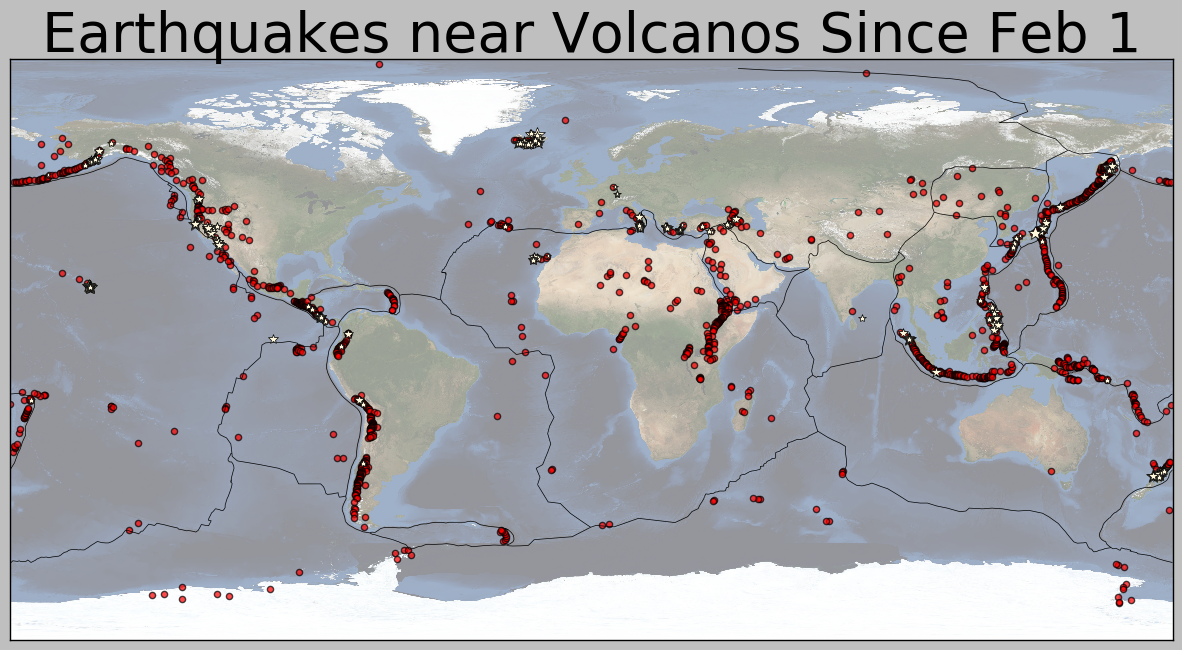

In [29]:
plt.figure(figsize=(15, 12))
map1.scatter(x1,y1,c='red',marker="o",alpha=0.7)
m = earth_near(eqdata1['Longitude'], eqdata1['Latitude'], eqdata1['Mag'], min_marker_size=2)
plt.title('Earthquakes near Volcanos Since Feb 1', color='#000000', fontsize=40)
plt.show()

---------

We see that they are quite close to tetonic plates. The white stars are the earthquakes, and the red circles are the volcanos. As we see, the earthquakes are all quite close to the volcanos. In addition, the size of the stars is based upon the magnitude of the earthquake.

----------

<h2> Where are these earthquakes happening the most?</h2>

In [30]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

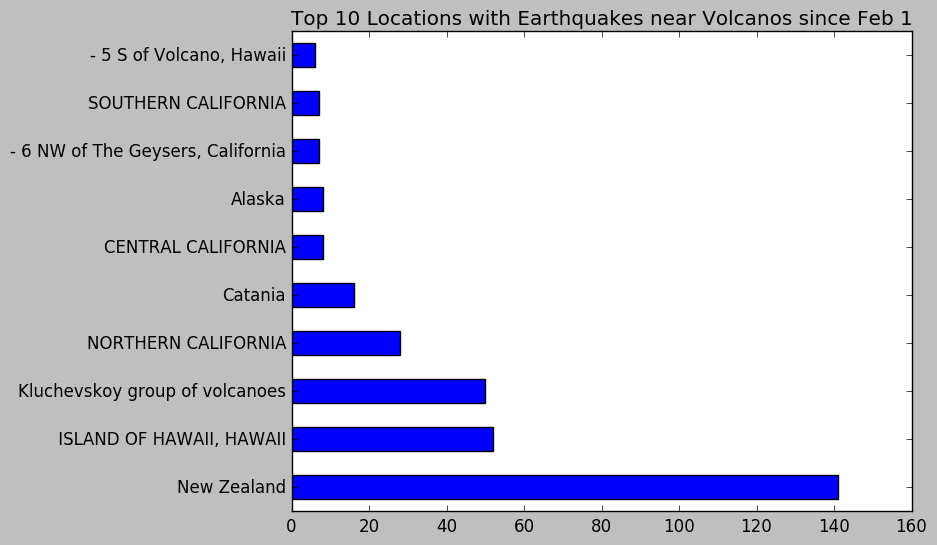

In [31]:
eqdata1['Location'].value_counts()[:10].plot(kind = 'barh', title = 'Top 10 Locations with Earthquakes near Volcanos since Feb 1')
plt.show()

For Top 3 (out of 10) : We see that New Zealand has had the most earthquakes, followed by the big island of Hawai'i, then Russia. We also see that Central California, southern California, Northern California (which should include the Geysers) also have a lot of activity as well.

------------------

<h2>Is there a specific magnitude that is happening more frequently?</h2>

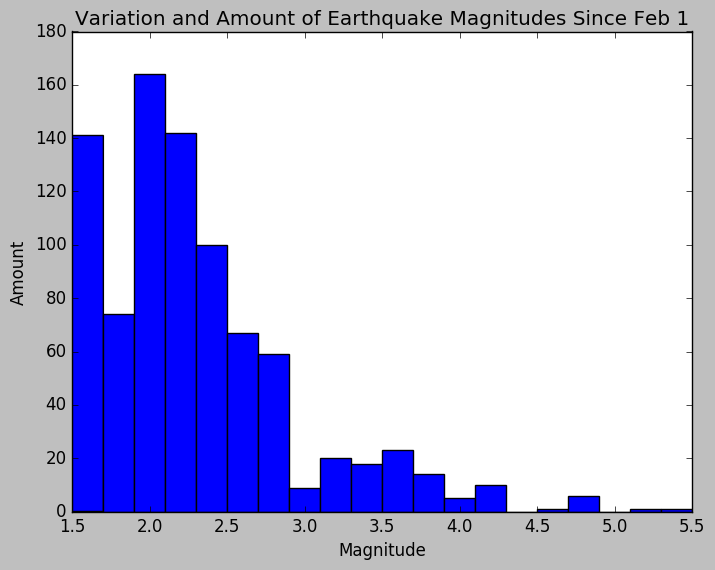

In [32]:
plt.figure()
plt.hist(eqdata1['Mag'].dropna(), bins = 20)
plt.xlabel('Magnitude')
plt.ylabel('Amount')
plt.title("Variation and Amount of Earthquake Magnitudes Since Feb 1")
plt.show()

Most of the earthquakes magnitudes are quite small, as in 2.5 or below.

-------------------

<h2>Is there a correlation between the depth of the earthquake and the magnitude of the earthquake?</h2>

C:\Users\jenat\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


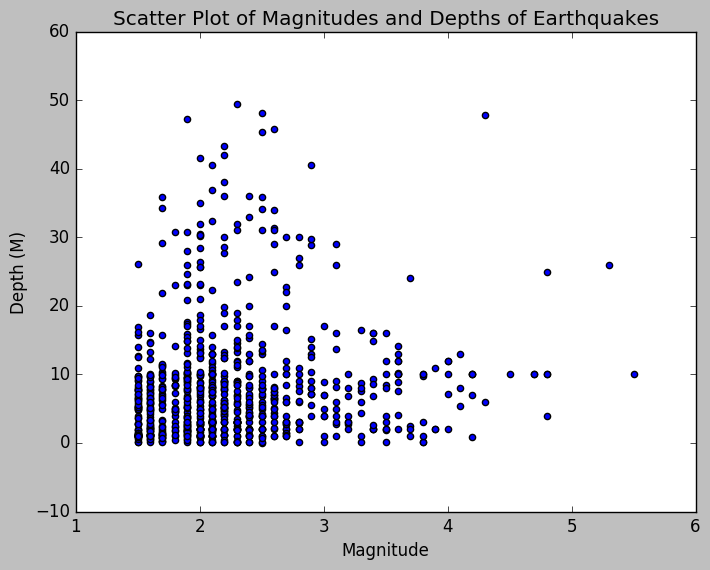

In [33]:
import matplotlib.pyplot
import pylab
import os
os.chdir('C:\Users\jenat\\Documents\\ringoffire')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

tes3 = pd.read_csv('earthquakesdata.csv',usecols = [1,2])#dataset
data1 = tes3.convert_objects(convert_numeric=True)
data1 = data1.rename(columns={' Depth': 'Depth'})

matplotlib.pyplot.scatter(data1.Mag,data1.Depth)
matplotlib.pyplot.title('Scatter Plot of Magnitudes and Depths of Earthquakes')
matplotlib.pyplot.xlabel("Magnitude")
matplotlib.pyplot.ylabel("Depth (M)")
matplotlib.pyplot.show()


-----

As we can see, there is not a strong correlation between Magnitudes of earthquakes and the depths of the earthquakes. Most of the earthquakes from smaller magnitudes to the larger ones are typically within the same range of depth, which indicates that magnitude an depth are likely not correlated.

--------------------

<h3> Let's use a Spearman, non-parametric correlation test between Magnitude and Depth</h3>

In [34]:
import os
os.chdir('C:\Users\jenat\\Documents\\ringoffire')
import pandas as pd

data1.corr()

data1.corr(method='spearman', min_periods=1)

Mag     Depth
Mag    1.000000  0.139534
Depth  0.139534  1.000000

The matrix correlation, using the spearman test concerning the two columns magnitude and Depth, indicates too that there is not a strong correlation between Magnitude and Depth. 

-------

<b>CONCLUSION</b>

There is not enough scientific evidence, or data to link earthquakes and volcano eruptions as being statistically significant to one another. More specifically, if an Earthquake can cause a volcanic eruption. While scientists are still debating the connection between the two, there is evidence that earthquakes occur (and rather frequently) near volcanos. With that information given, this brings the possibility that it is possible for earthquakes and volcanos to correlate with one another.

Another aspect worth looking into, is determing which earthquake is an aftershock and which earthquake is not.